In [78]:
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, average_precision_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
seed = 1

%matplotlib inline

In [23]:
df = pd.read_csv('HTRU_2.csv', header=None)
df.columns = [f'var{col}' for col in df.columns]

In [93]:
X = df[df.columns[:-5]]
y = df.var8

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=seed)

In [95]:
def assess_model(pl, X_train, X_test, y_train, y_test):
        
    # train assessment
    pl.fit(X_train, y_train)
    y_preds = pl.predict(X_train)
    print('##### Train #####')
    print(classification_report(y_train, y_preds))
    
    # dev assessment
    y_preds = pl.predict(X_test)
    print('##### Test #####')
    print(classification_report(y_test, y_preds))
    
    return pl

In [100]:
pl = Pipeline([
    ('scaler',  StandardScaler()),
    ('lr', LogisticRegression(solver='lbfgs', random_state=seed))
])

pl_bal = Pipeline([
    ('scaler',  StandardScaler()),
    ('lr', LogisticRegression(solver='lbfgs', random_state=seed, class_weight='balanced'))
])

pl_ridge = Pipeline([
    ('scaler',  StandardScaler()),
    ('lr', LogisticRegression(random_state=seed))
])

In [101]:
pl = assess_model(pl, X_train, X_test, y_train, y_test)

##### Train #####
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13007
           1       0.94      0.79      0.86      1311

   micro avg       0.98      0.98      0.98     14318
   macro avg       0.96      0.89      0.92     14318
weighted avg       0.98      0.98      0.98     14318

##### Test #####
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3252
           1       0.94      0.80      0.87       328

   micro avg       0.98      0.98      0.98      3580
   macro avg       0.96      0.90      0.93      3580
weighted avg       0.98      0.98      0.98      3580



In [102]:
pl_bal = assess_model(pl_bal, X_train, X_test, y_train, y_test)

##### Train #####
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     13007
           1       0.77      0.89      0.83      1311

   micro avg       0.97      0.97      0.97     14318
   macro avg       0.88      0.93      0.91     14318
weighted avg       0.97      0.97      0.97     14318

##### Test #####
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3252
           1       0.76      0.89      0.82       328

   micro avg       0.96      0.96      0.96      3580
   macro avg       0.87      0.93      0.90      3580
weighted avg       0.97      0.96      0.97      3580



In [103]:
pl_ridge = assess_model(pl_ridge, X_train, X_test, y_train, y_test)

##### Train #####
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13007
           1       0.94      0.79      0.86      1311

   micro avg       0.98      0.98      0.98     14318
   macro avg       0.96      0.89      0.92     14318
weighted avg       0.98      0.98      0.98     14318

##### Test #####
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3252
           1       0.94      0.80      0.87       328

   micro avg       0.98      0.98      0.98      3580
   macro avg       0.96      0.90      0.93      3580
weighted avg       0.98      0.98      0.98      3580



/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [104]:
y_preds = pl_bal.decision_function(X_test)

In [79]:
log_loss(y_test, pl.predict(X_test))

0.6946384060306943

In [80]:
log_loss(y_test, pl_bal.predict(X_test))

1.0516165911871402

Text(0.5,1,'2-class Precision-Recall curve: AP=0.92')

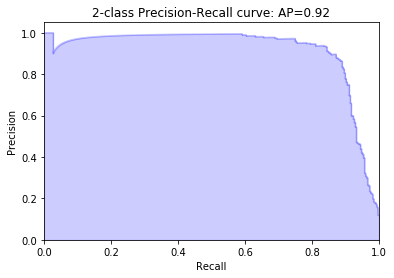

In [77]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature

precision, recall, _ = precision_recall_curve(y_test, y_preds)
average_precision = average_precision_score(y_test, y_preds)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))